In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def readInput (fileName):
    '''
    * takes as input fileName of the data file.
    * returns pandas dataframe for the data.
    '''
    df = pd.read_csv (fileName, header=None)
    return df

In [3]:
def perceptron(data):
    ''' 
    * implements perceptron learning algorithm
    * data is assumed to be a pandas dataframe with column names as [0,1,2...] 
    * final learned weight w is returned as np array.
    '''
    iter = 0
    w_hist = []
    feat_len = len(data.columns) - 1
    w = np.random.randn(feat_len + 1)
    result = []
    while True:
        w_hist.append (w)
        flag = True
        for i in range (0, len(data)):
            x = np.array([1] + [data.iloc[i, el] for el in range (0, feat_len)])
            y = data.iloc[i, feat_len]
            predicted = int(np.dot(w, x) >= 0)
            if y != predicted:
                flag = False
                v = 2 * y - 1
                w = w + v * x
            
        iter += 1
        if iter == 1e3 or flag:
            break
            
    if iter == 1e3:
        print ("Does not converge.")
    else:
        print ("Converged in {} steps.".format(iter))
        
    return w, w_hist
  
        

In [4]:
def plot_output (data, w):
    zx = []
    zy = []
    ox = []
    oy = []
    feat_len = len(data.columns) - 1
    for i in range (0, len(data)):
        if (data.iloc[i, feat_len] == 1):
            ox.append (data.iloc[i, 0])
            oy.append (data.iloc[i, 1])
        else:
            zx.append (data.iloc[i, 0])
            zy.append (data.iloc[i, 1])
    plt.plot (zx, zy, 'r.', label='0')
    plt.plot (ox, oy, 'b.', label='1')
    minx = min(min(zx), min(ox))
    maxx = max(max(zx), max(ox))
    miny = - (w[0] + w[1] * minx) / (w[2] + 1e-9)
    maxy = - (w[0] + w[1] * maxx) / (w[2] + 1e-9)
    plt.plot ([minx, maxx], [miny, maxy], 'o-')
    plt.show()
        

In [5]:
def calculate_loss(data, w):
    loss = 0
    feat_len = len(data.columns) - 1
    for i in range (0, len(data)):
        x = np.array([1] + [data.iloc[i, el] for el in range (0, feat_len)])
        y = data.iloc[i, feat_len]
        predicted = int(np.dot(w, x) >= 0)
        if y != predicted:
            loss += 1
    return loss

Converged in 2 steps.


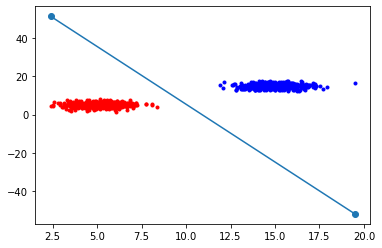

In [6]:
train_df = readInput('Datasets-Question1/dataset1/Train1.csv')
w, w_hist = perceptron(train_df)
# Plot for training data.
plot_output (train_df, w)

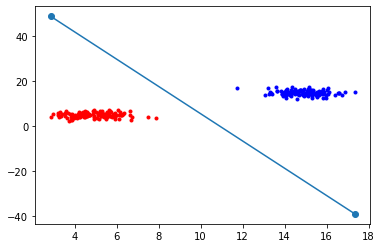

In [7]:
# Plot for test data
test_df = readInput('Datasets-Question1/dataset1/Test1.csv')
plot_output (test_df, w)

loss and classification error are identical for perceptron so drawing only 1 graph.

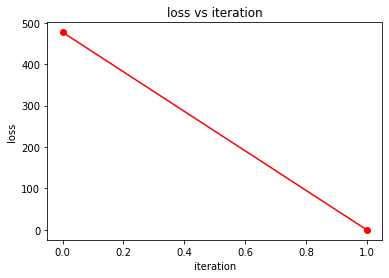

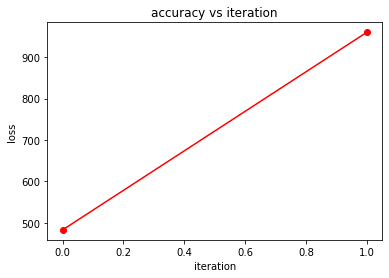

In [8]:
loss_ar = []
for w in w_hist:
    loss_ar.append (calculate_loss(train_df, w))

plt.title('loss vs iteration')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot (range(0, len(loss_ar)), loss_ar, 'ro-')
plt.show()

accuracy = [(len(train_df) - x) for x in loss_ar]
plt.title('accuracy vs iteration')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot (range(0, len(accuracy)), accuracy, 'ro-')
plt.show()


In [9]:
def metrics (data, w):
    tp, tn, fp, fn = 0, 0, 0, 0
    loss = 0
    feat_len = len(data.columns) - 1
    for i in range (0, len(data)):
        x = np.array([1] + [data.iloc[i, el] for el in range (0, feat_len)])
        y = data.iloc[i, feat_len]
        predicted = int(np.dot(w, x) >= 0)
        if predicted == y:
            if predicted == 1:
                tp += 1
            else:
                tn += 1
        else:
            if predicted == 1:
                fp += 1
            else:
                fn += 1
            
    return tp, tn, fp, fn

In [10]:
tp, tn, fp, fn = metrics(train_df, w)
print ('For training data')
print ('True positives = {}'.format(tp))
print ('True negatives = {}'.format(tn))
print ('False positives = {}'.format(fp))
print ('False negatives = {}'.format(fn))
print ('Classification accuracy = {}%'.format((tp + tn) / len(train_df) * 100))

For training data
True positives = 483
True negatives = 477
False positives = 0
False negatives = 0
Classification accuracy = 100.0%


In [11]:
tp, tn, fp, fn = metrics(test_df, w)
print ('For test data')
print ('True positives = {}'.format(tp))
print ('True negatives = {}'.format(tn))
print ('False positives = {}'.format(fp))
print ('False negatives = {}'.format(fn))
print ('Classification accuracy = {}%'.format((tp + tn) / len(test_df) * 100))


For test data
True positives = 117
True negatives = 123
False positives = 0
False negatives = 0
Classification accuracy = 100.0%


In [12]:
print ('There are {} elements in training data.'.format(len(train_df)))
train_df.head()

There are 960 elements in training data.


,0,1,2
0,4.830686,3.050905,0.0
1,4.385330,4.491989,0.0
2,5.653520,4.852372,0.0
3,3.487049,5.517360,0.0
4,6.339344,5.173789,0.0


In [13]:
print ('There are {} elements in test data.'.format(len(test_df)))
test_df.head()

There are 240 elements in test data.


,0,1,2
0,4.257714,4.129628,0.0
1,3.524991,5.641825,0.0
2,14.621384,14.530985,1.0
3,15.555876,15.010700,1.0
4,3.272855,3.825943,0.0


It looks like the data is generated using 2 gaussian functions as the density is higher towards the center and low towards the edges.